Score: 600/600. Accuracy: 1.0


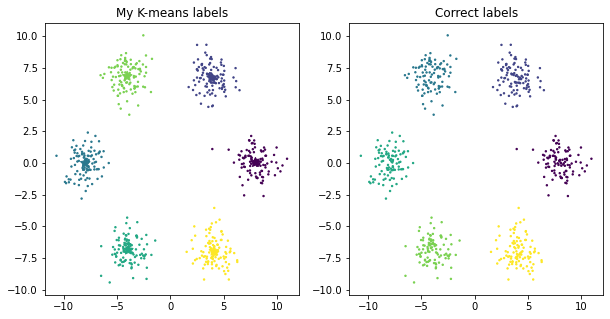

In [15]:
import numpy as np
from itertools import permutations
from sklearn import datasets
from matplotlib import pyplot
from my_kmeans import my_kmeans

def score(y_true, y_pred):
  n_clusters = int(np.max(y_true)) + 1
  max_score = 0
  for perm in permutations(list(range(n_clusters))):
    perm_score = sum(
      np.sum(np.logical_and(y_pred == perm[i], y_true == i))
      for i in range(n_clusters)
    )
    if perm_score > max_score:
      max_score = perm_score
  # return maximum score among all possible permutations of labels
  return max_score


def kmeans_test(dataname, smart=False):
  data = np.genfromtxt('{}.csv'.format(dataname), delimiter=',')
  X, y_true = data[:, :2], data[:, 2]
  n_clusters = int(np.max(y_true)) + 1

  centroids_mykm, y_pred_mykm = my_kmeans(X, n_clusters=n_clusters, smart=smart)
  score_mykm = score(y_true, y_pred_mykm)
  print('Score: {}/{}. Accuracy: {}'.format(
    score_mykm, y_true.shape[0], score_mykm / y_true.shape[0]
  ))

  pyplot.rcParams['figure.figsize'] = (10, 5)
  pyplot.subplot(1, 2, 1).set_title('My K-means labels')
  pyplot.scatter(X[:, 0], X[:, 1], c=y_pred_mykm, s=2)
  pyplot.scatter(
    centroids_mykm[:, 0], centroids_mykm[:, 1],
    marker=(5, 1), c=np.arange(n_clusters), s=100)

  pyplot.subplot(1, 2, 2).set_title('Correct labels')
  pyplot.scatter(X[:, 0], X[:, 1], c=y_true, s=2)
  pyplot.show()


def kmeans_testblobs(n_trials=10, smart=False):
  data = np.genfromtxt('{}.csv'.format('blobs'), delimiter=',')
  X, y_true = data[:, :2], data[:, 2]
  n_clusters = int(np.max(y_true)) + 1
  scores = np.zeros(n_trials)

  for t in range(n_trials):
    centroids_mykm, y_pred_mykm = my_kmeans(X, n_clusters=n_clusters, smart=smart)
    score_mykm = score(y_true, y_pred_mykm)
    print('Trial t = {}. Score: {}/{}. Accuracy: {}'.format(
      t+1, score_mykm, y_true.shape[0], score_mykm / y_true.shape[0]
    ))
    scores[t] = score_mykm

  print('---------------------------------------------------')
  print('Completed {} trials.'.format(n_trials))
  average_score = np.mean(scores)
  n_samples = y_true.shape[0]
  print('Average score: {}/{} ({}%%)'.format(
    average_score, n_samples, round(100 * average_score / n_samples, 2)
  ))
  n_perfect_trials = int(np.sum(scores == y_true.shape[0]))
  print('Perfect score achieved: {}/{} trials ({}%%)'.format(
    n_perfect_trials, n_trials, round(100 * n_perfect_trials / n_trials, 2)
  ))


kmeans_test('blobs', smart=False)   # Uncomment de test cau hoi TH1
# kmeans_testblobs(100, smart=False)  # Uncomment de test cau hoi TH2. Doi smart=False thanh smart=True de test centroi_smart_select cura ban
# kmeans_test('mouse', smart=False)   # Uncomment de test cau hoi TH3A. Doi smart=False thanh smart=True de so sanh output
# kmeans_test('circles', smart=False) # Uncomment de test cau hoi TH3B. Doi smart=False thanh smart=True de so sanh output
